<a href="https://colab.research.google.com/github/VKSi/2021_01_NeuralNetworks/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
a = (5, 5)

In [ ]:
b = [a]*5
b

[(5, 5), (5, 5), (5, 5), (5, 5), (5, 5)]

# Введение в искусственные нейронные сети
# Урок 2. Keras

## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)

# Решения

## Подготовка данных

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.optimizers import Adam, RMSprop, SGD
from sklearn.metrics import accuracy_score

In [ ]:
(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

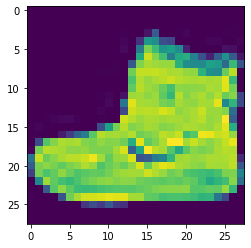

In [ ]:
plt.imshow(train_imagesi[0,:,:])
plt.show()

In [ ]:
train_imagesi.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
test_imagesi.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Normalize the images.
train_images = (train_imagesi / 127) - 1
test_images = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# # derive validation set
# train_n = int(train_images.shape[0]*0.8)
# val_images = train_images[train_n:, :]
# train_images = train_images[:train_n, :]

# prepare target
X_train = train_images.copy()
y_train = to_categorical(train_labels)
# y_val = y_train[train_n:, :]
# y_train = y_train[:train_n, :]
X_test = test_images.copy()
y_test = to_categorical(test_labels)

## 1.a Опишите - какой результат получен в нейросети в зависимости от:

числа нейронов в слое(для 2-хслойной сети)

Для n=16 accuracy train = 0.883, 	 accuracy test = 0.857
Для n=32 accuracy train = 0.891, 	 accuracy test = 0.862
Для n=48 accuracy train = 0.908, 	 accuracy test = 0.869
Для n=64 accuracy train = 0.915, 	 accuracy test = 0.876
Для n=80 accuracy train = 0.917, 	 accuracy test = 0.875
Для n=96 accuracy train = 0.899, 	 accuracy test = 0.858
Для n=112 accuracy train = 0.922, 	 accuracy test = 0.882
Для n=128 accuracy train = 0.915, 	 accuracy test = 0.873
Для n=144 accuracy train = 0.918, 	 accuracy test = 0.875
Для n=160 accuracy train = 0.919, 	 accuracy test = 0.88
Для n=176 accuracy train = 0.921, 	 accuracy test = 0.878
Для n=192 accuracy train = 0.925, 	 accuracy test = 0.882
Для n=208 accuracy train = 0.926, 	 accuracy test = 0.883
Для n=224 accuracy train = 0.925, 	 accuracy test = 0.88
Для n=240 accuracy train = 0.92, 	 accuracy test = 0.877
Для n=256 accuracy train = 0.929, 	 accuracy test = 0.881
Для n=272 accuracy train = 0.914, 	 accuracy test = 0.87
Для n=288 accuracy train

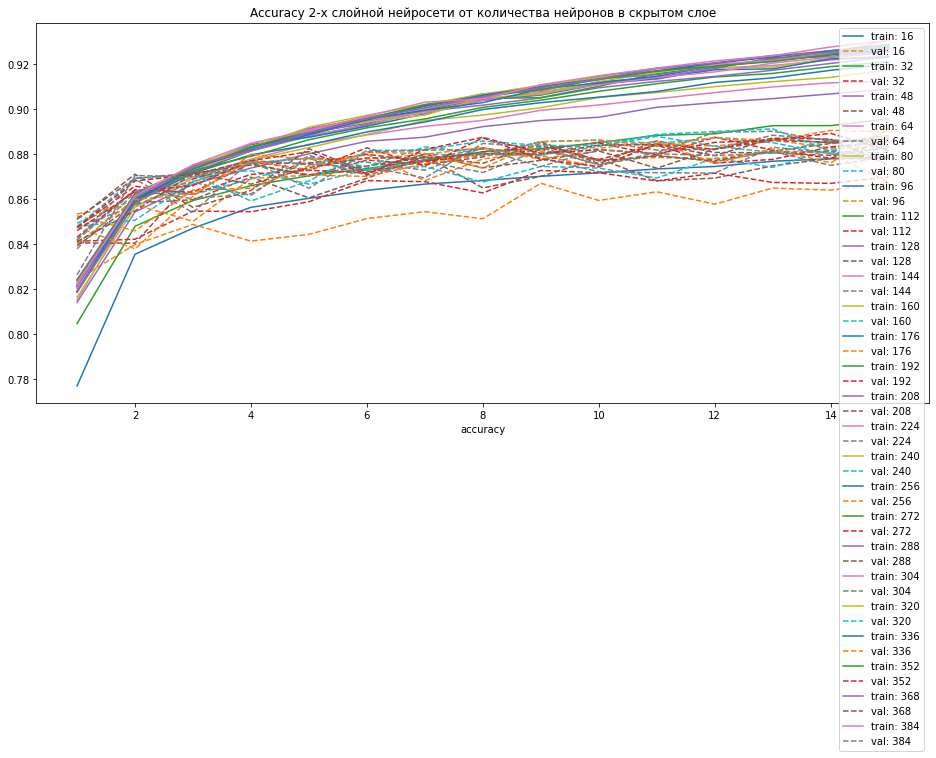

In [ ]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs)


results1 = list()
# будем изменять количество нейронов в скрытом слое
for n in range(16, 400, 16):
  # создаем рабочую модель model с одним из значений числа нейронов
  model = Sequential([
                        Dense(n, activation='relu', input_shape=(784,)),
                        Dense(10, activation='softmax'),
                        ])

  # компилируем model
  model.compile(
      optimizer=Adam(),
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )

  # проводим обучение модели 
  hh = model.fit(X_train, y_train,
                  epochs=epochs, batch_size=32, validation_split=0.2, verbose = 0
                )

  train_pred = model.predict(X_train)
  train_pred = to_categorical(np.argmax(train_pred, axis=1))
  train_score = accuracy_score(y_train, train_pred)

  test_pred = model.predict(X_test)
  test_pred = to_categorical(np.argmax(test_pred, axis=1))
  test_score = accuracy_score(y_test, test_pred)
  print(f'Для n={n} accuracy train = {train_score:.3}, \t accuracy test = {test_score:.3}')
  results1.append([n, round(train_score, 3), round(test_score, 3)])

  # картинки
  plt.plot(epoch + 1, hh.history['accuracy'],'-', label = f'train: {n}')
  plt.plot(epoch + 1, hh.history['val_accuracy'],'--', label = f'val: {n}')
  

plt.legend()
plt.title('Accuracy 2-х слойной нейросети от количества нейронов в скрытом слое')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


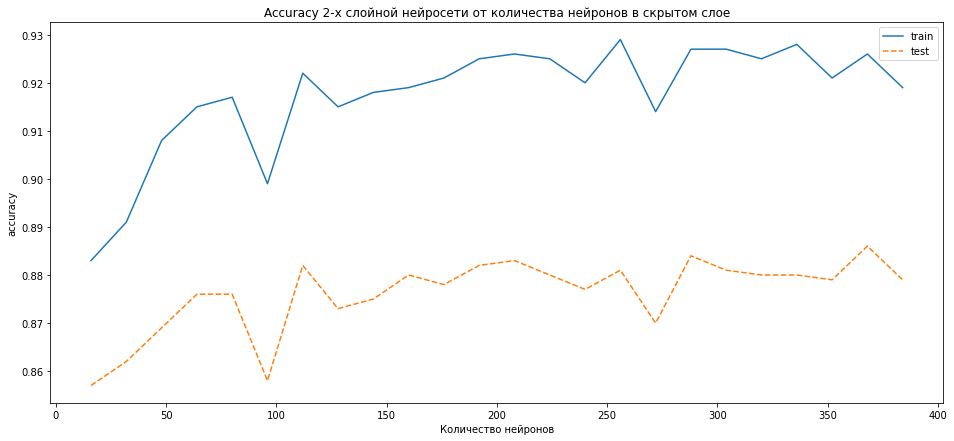

In [ ]:
plt.figure(figsize=(16,7))
results = np.array(results1).transpose()
plt.plot(results[0], results[1], '-', label = 'train')
plt.plot(results[0], results[2], '--', label = 'test')
plt.legend()
plt.title('Accuracy 2-х слойной нейросети от количества нейронов в скрытом слое')
plt.xlabel('Количество нейронов')
plt.ylabel('accuracy')
plt.show()

## 1.b Опишите - какой результат получен в нейросети в зависимости от:

числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров)

Для n=2 	 accuracy train = 0.908, 	 accuracy test = 0.868
Для n=3 	 accuracy train = 0.927, 	 accuracy test = 0.879
Для n=5 	 accuracy train = 0.912, 	 accuracy test = 0.878
Для n=10 	 accuracy train = 0.912, 	 accuracy test = 0.878


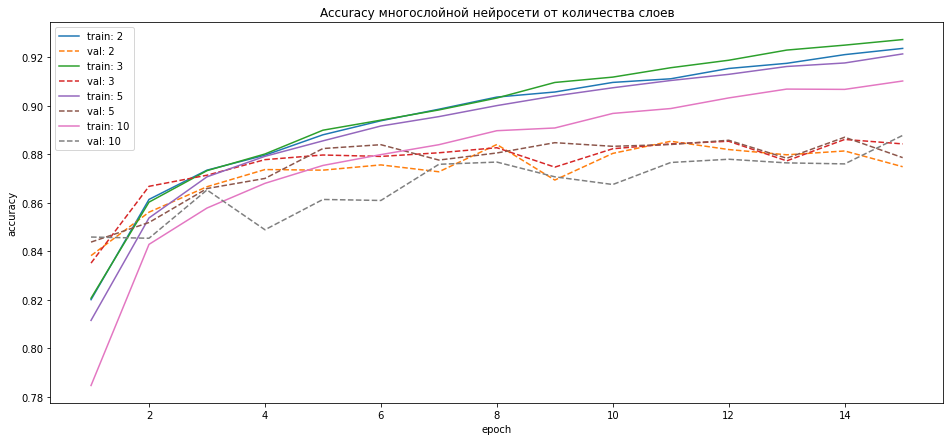

In [ ]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для вывода результатов
epoch = np.arange(epochs)
results2 = list()

# будем изменять количество число слоев
for n in [2, 3, 5, 10]:
  # создаем рабочую модель model с одним из значений числа слоев
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=(784,)))
  for i in range(n - 2):
    model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  
  # компилируем model
  model.compile(
      optimizer=Adam(),
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )

  # проводим обучение модели 
  # проводим обучение модели 
  hh = model.fit(X_train, y_train,
                  epochs=epochs, batch_size=32, validation_split=0.2, verbose = 0
                )

  train_pred = model.predict(X_train)
  train_pred = to_categorical(np.argmax(train_pred, axis=1))
  train_score = accuracy_score(y_train, train_pred)

  test_pred = model.predict(X_test)
  test_pred = to_categorical(np.argmax(test_pred, axis=1))
  test_score = accuracy_score(y_test, test_pred)
  print(f'Для n={n} \t accuracy train = {train_score:.3}, \t accuracy test = {test_score:.3}')
  results2.append([n, round(train_score, 3), round(test_score, 3)])

  # картинки
  plt.plot(epoch + 1, hh.history['accuracy'],'-', label = f'train: {n}')
  plt.plot(epoch + 1, hh.history['val_accuracy'],'--', label = f'val: {n}')
  

plt.legend()
plt.title('Accuracy многослойной нейросети от количества слоев')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()



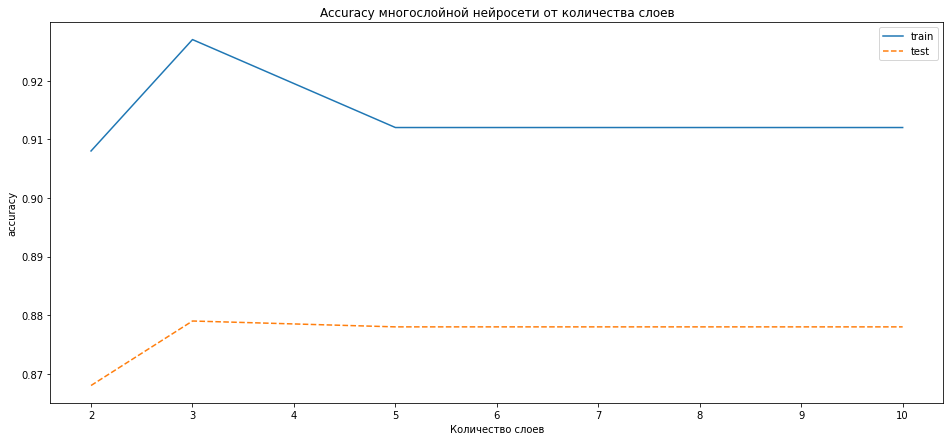

In [ ]:
plt.figure(figsize=(16,7))
results = np.array(results2).transpose()
plt.plot(results[0], results[1], '-', label = 'train')
plt.plot(results[0], results[2], '--', label = 'test')
plt.legend()
plt.title('Accuracy многослойной нейросети от количества слоев')
plt.xlabel('Количество слоев')
plt.ylabel('accuracy')
plt.show()

## 2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.     
Фиксируйте для тренировочного и тестового набора метрики accuracy.

Для оптимизатора Adam accuracy train = 0.915, 	 accuracy test = 0.874
Для оптимизатора SGD accuracy train = 0.903, 	 accuracy test = 0.871
Для оптимизатора RMSprop accuracy train = 0.922, 	 accuracy test = 0.876


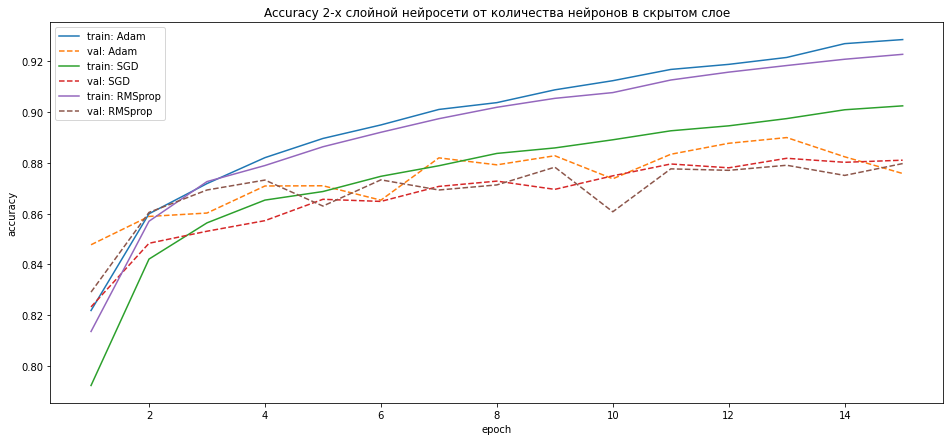

In [ ]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs)


results3 = list()
# будем изменять оптимизаторы
for opt in [Adam(), SGD(), RMSprop()]:
  # создаем рабочую модель model с одним из значений числа нейронов
  model = Sequential([
                        Dense(256, activation='relu', input_shape=(784,)),
                        Dense(10, activation='softmax'),
                        ])

  # компилируем model
  model.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )

  # проводим обучение модели 
  hh = model.fit(X_train, y_train,
                  epochs=epochs, batch_size=32, validation_split=0.2, verbose = 0
                )

  train_pred = model.predict(X_train)
  train_pred = to_categorical(np.argmax(train_pred, axis=1))
  train_score = accuracy_score(y_train, train_pred)

  test_pred = model.predict(X_test)
  test_pred = to_categorical(np.argmax(test_pred, axis=1))
  test_score = accuracy_score(y_test, test_pred)
  print(f"Для оптимизатора {model.optimizer.get_config()['name']} accuracy train = {train_score:.3}, \t accuracy test = {test_score:.3}")
  results3.append([model.optimizer.get_config()['name'], round(train_score, 3), round(test_score, 3)])

  # картинки
  plt.plot(epoch + 1, hh.history['accuracy'],'-', label = f"train: {model.optimizer.get_config()['name']}")
  plt.plot(epoch + 1, hh.history['val_accuracy'],'--', label = f"val: {model.optimizer.get_config()['name']}")
  

plt.legend()
plt.title('Accuracy 2-х слойной нейросети от количества нейронов в скрытом слое')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


## 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

Улучшение метрики на тестовом датасете наблюдается при увеличении количества нейронов в район 200.      
Количество слоев выше 3-х улучшение метрики не дает     
Лучший результат получен для оптимизатора RMSprop

## 4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)

In [ ]:
# создаем рабочую модель model
model = Sequential([
                      Dense(256, activation='relu', input_shape=(784,)),
                      Dense(256, activation='relu'),
                      Dense(10, activation='softmax'),
                      ])

# компилируем model
model.compile(
    optimizer=RMSprop(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

# проводим обучение модели 
hh = model.fit(X_train, y_train,
                epochs=epochs, batch_size=32, validation_split=0.2, verbose = 0
              )

train_pred = model.predict(X_train)
train_pred = to_categorical(np.argmax(train_pred, axis=1))
train_score = accuracy_score(y_train, train_pred)

test_pred = model.predict(X_test)
test_pred = to_categorical(np.argmax(test_pred, axis=1))
test_score = accuracy_score(y_test, test_pred)
print(f'Для n={n} accuracy train = {train_score:.3}, \t accuracy test = {test_score:.3}')
results1.append([n, round(train_score, 3), round(test_score, 3)])

Для n=10 accuracy train = 0.912, 	 accuracy test = 0.877


In [ ]:
test_pred.shape

(10000, 10)

In [ ]:
import pandas as pd

In [ ]:
(test_pred[:, 1] * y_test[:, 1]).shape

(10000,)

In [ ]:
df = pd.DataFrame(index=list(range(test_pred.shape[1])))
df['Class'] = df.index + 1
for i in df.index:
  df.loc[i, 'TP'] = (test_pred[:, i] * y_test[:, i]).sum()
  df.loc[i, 'TN'] = ((test_pred[:, i] - 1) * (y_test[:, i] - 1)).sum()
  df.loc[i, 'FP'] = -((test_pred[:, i]) * (y_test[:, i] - 1)).sum()
  df.loc[i, 'FN'] = -((test_pred[:, i] - 1) * (y_test[:, i])).sum()
  df['Precision'] = (df.TP / (df.TP + df.FP)) *1000 // 10 /100
  df['Recall'] = (df.TP / (df.TP + df.FN)) *1000 // 10 /100
df

,Class,TP,TN,FP,FN,Precision,Recall
0,1,843.0,8808.0,192.0,157.0,0.81,0.84
1,2,952.0,8997.0,3.0,48.0,0.99,0.95
2,3,775.0,8831.0,169.0,225.0,0.82,0.77
3,4,903.0,8847.0,153.0,97.0,0.85,0.90
4,5,807.0,8783.0,217.0,193.0,0.78,0.80
5,6,951.0,8953.0,47.0,49.0,0.95,0.95
6,7,685.0,8716.0,284.0,315.0,0.70,0.68
7,8,948.0,8924.0,76.0,52.0,0.92,0.94
8,9,974.0,8940.0,60.0,26.0,0.94,0.97
9,10,930.0,8969.0,31.0,70.0,0.96,0.93
